Nothing is labled or organized quite yet!

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import linregress
import numpy as np
from getdata import netflix_df
from getdata import actors_df

In [59]:
duplicated_actors = actors_df.drop(actors_df[actors_df['role'] == 'DIRECTOR'].index)
duplicated_actors = duplicated_actors[duplicated_actors.duplicated("name", keep=False)]

In [60]:
new_netflix_df = pd.DataFrame({"id": netflix_df["id"], 
                  "imdb_score": netflix_df["imdb_score"], 
                  "imdb_votes": netflix_df["imdb_votes"], 
                  "title": netflix_df["title"]
                  })
new_netflix_df = new_netflix_df.dropna()

In [61]:
actor_dict = {}
for index, row in duplicated_actors.iterrows():
    if row["id"] in actor_dict: 
        actor_dict[str(row["id"])].append(row["name"])
    else: 
        actor_dict[str(row["id"])] = [row["name"]]
    

In [62]:
cast_list = []

for key, value in actor_dict.items():
    cast_list.append({"id": key, "cast": value})

cast_df = pd.DataFrame(cast_list, columns=["id", "cast"])


In [63]:
final_cast_df = new_netflix_df.merge(cast_df)

In [64]:
actor_list = []

for index, row in final_cast_df.iterrows():
    for actor in row["cast"]:
                actor_list.append({"name": actor, "imdb_score": row["imdb_score"], "imdb_votes": row["imdb_votes"]})

multiple_actor_df = pd.DataFrame(actor_list, columns=["name", "imdb_score", "imdb_votes"])


In [65]:
most_votes_df = pd.DataFrame(multiple_actor_df.groupby("name")["imdb_votes"].sum())
average_votes_df = pd.DataFrame(multiple_actor_df.groupby("name")["imdb_score"].mean())

In [66]:
final_actor_df = pd.merge(most_votes_df, average_votes_df, on="name")

final_actor_df

,imdb_votes,imdb_score
name,,
'Weird Al' Yankovic,21702.0,6.500000
50 Cent,174900.0,6.866667
A$AP Rocky,13477.0,6.650000
A.D. Miles,64622.0,6.766667
A.J. LoCascio,43207.0,6.500000
...,...,...
İştar Gökseven,21325.0,6.933333
Łukasz Simlat,8484.0,6.600000
Şafak Sezer,99800.0,7.133333


In [67]:
most_votes_df = final_actor_df.sort_values("imdb_votes", ascending=False)
most_votes_df = most_votes_df.dropna()
most_votes_df

,imdb_votes,imdb_score
name,,
Leonardo DiCaprio,8313221.0,7.925
Cillian Murphy,5094611.0,8.450
Marion Cotillard,5003252.0,7.800
Morgan Freeman,4803877.0,7.250
Tom Hardy,4761544.0,7.975
...,...,...
Felicia Chin,6.0,5.400
Ava Yu,6.0,5.700
Patrick Tang,6.0,5.700


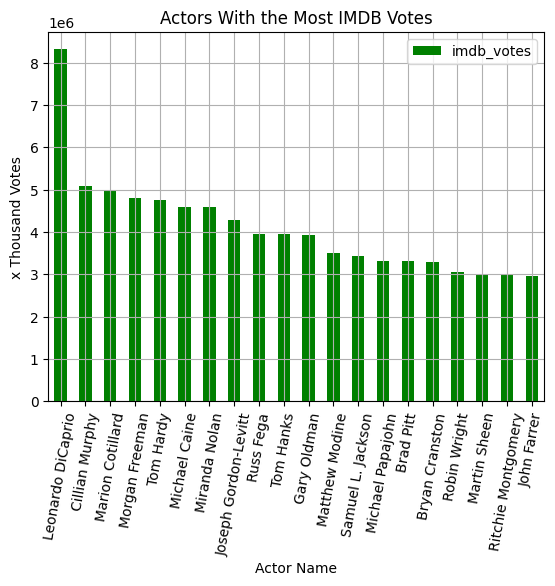

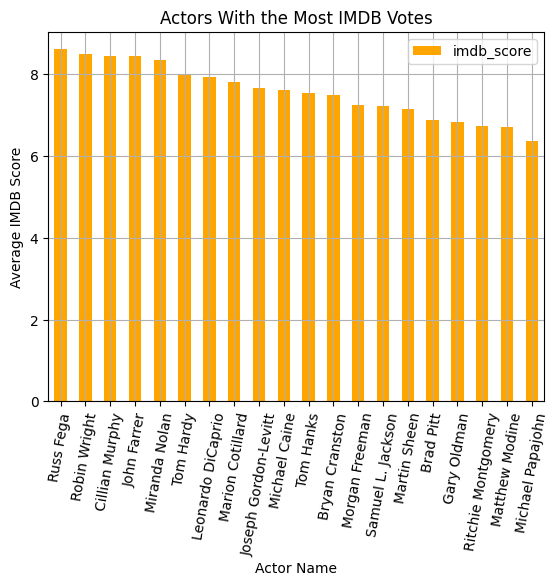

In [68]:
top_twenty = most_votes_df.head(20)
top_twenty.plot.bar(y='imdb_votes', color='green', width=0.5)
plt.xlabel('Actor Name')
plt.title('Actors With the Most IMDB Votes')
plt.ylabel('x Thousand Votes')
plt.xlabel('Actor Name')
plt.xticks(rotation=80)
plt.grid()

top_twenty_by_rating = top_twenty.sort_values("imdb_score", ascending=False)
top_twenty_by_rating.plot.bar(y='imdb_score', color='orange', width=0.5)
plt.title('Actors With the Most IMDB Votes')
plt.xlabel('Actor Name')
plt.ylabel('Average IMDB Score')
plt.xticks(rotation=80)
plt.grid()

plt.show()

In [69]:
best_movies_df = final_actor_df.sort_values("imdb_score", ascending=False)
best_movies_df = best_movies_df.dropna()
best_movies_df = best_movies_df[best_movies_df["imdb_votes"] >= 10000]
best_movies_df.head(10)

,imdb_votes,imdb_score
name,,
Emily Carey,2021343.0,8.800000
Yoo Yeon-seok,12153.0,8.750000
Russ Fega,3963298.0,8.600000
Akari Kito,138247.0,8.600000
Shanola Hampton,234232.0,8.600000
Choi Young-jun,22607.0,8.566667
Emily Hampshire,117203.0,8.550000
Sarah Levy,117203.0,8.550000
Kim Tae-hun,47053.0,8.550000


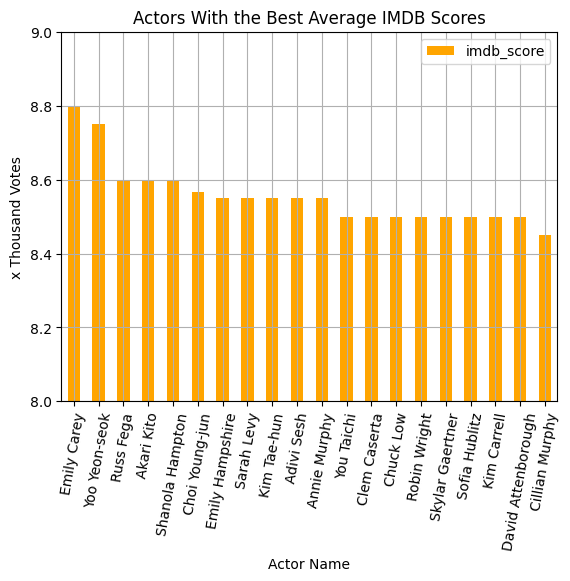

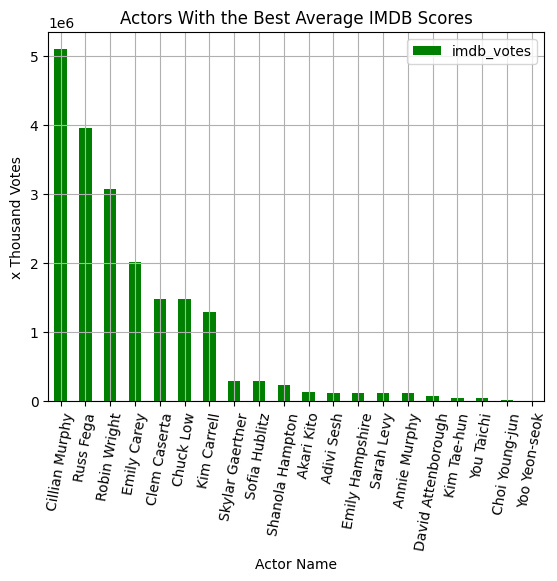

In [70]:
best_score = best_movies_df.head(20)
best_score.plot.bar(y='imdb_score', color='orange', width=0.5)
plt.xlabel('Actor Name')
plt.title('Actors With the Best Average IMDB Scores')
plt.ylabel('x Thousand Votes')
plt.ylim(bottom=8.0, top=9.0)
plt.xticks(rotation=80)
plt.grid()

best_score_most_votes = best_score.sort_values("imdb_votes", ascending=False)
best_score_most_votes.plot.bar(y='imdb_votes', color='green', width=0.5)
plt.title('Actors With the Best Average IMDB Scores')
plt.xlabel('Actor Name')
plt.ylabel('x Thousand Votes')
plt.xticks(rotation=80)
plt.grid()

plt.show()

In [71]:
final_cast_df.head()

,id,imdb_score,imdb_votes,title,cast
0,tm84618,8.2,808582.0,Taxi Driver,"[Robert De Niro, Harvey Keitel, Cybill Shepher..."
1,tm154986,7.7,107673.0,Deliverance,"[Jon Voight, Burt Reynolds, Ronny Cox, Billy R..."
2,tm127384,8.2,534486.0,Monty Python and the Holy Grail,"[Graham Chapman, John Cleese, Eric Idle, Terry..."
3,tm120801,7.7,72662.0,The Dirty Dozen,"[Lee Marvin, Ernest Borgnine, Jim Brown, Rober..."
4,ts22164,8.8,73424.0,Monty Python's Flying Circus,"[Graham Chapman, Michael Palin, Terry Jones, E..."


In [72]:
#e_carey = final_cast_df.loc[final_cast_df['cast'].apply(lambda x: any("Robin Wright"in item for item in x))]

#e_carey

In [73]:
new_netflix_df2 = pd.DataFrame({"id": netflix_df["id"], 
                  "tmdb_score": netflix_df["tmdb_score"], 
                  "tmdb_popularity": netflix_df["tmdb_popularity"], 
                  "title": netflix_df["title"]
                  })
new_netflix_df2 = new_netflix_df2.dropna()

In [74]:
final_cast_df2 = new_netflix_df2.merge(cast_df)
final_cast_df2.head()

,id,tmdb_score,tmdb_popularity,title,cast
0,tm84618,8.179,40.965,Taxi Driver,"[Robert De Niro, Harvey Keitel, Cybill Shepher..."
1,tm154986,7.300,10.010,Deliverance,"[Jon Voight, Burt Reynolds, Ronny Cox, Billy R..."
2,tm127384,7.811,15.461,Monty Python and the Holy Grail,"[Graham Chapman, John Cleese, Eric Idle, Terry..."
3,tm120801,7.600,20.398,The Dirty Dozen,"[Lee Marvin, Ernest Borgnine, Jim Brown, Rober..."
4,ts22164,8.306,17.617,Monty Python's Flying Circus,"[Graham Chapman, Michael Palin, Terry Jones, E..."


In [75]:
actor_list2 = []

for index, row in final_cast_df2.iterrows():
    for actor in row["cast"]:
                actor_list.append({"name": actor, "tmdb_score": row["tmdb_score"], "tmdb_popularity": row["tmdb_popularity"]})

multiple_actor_df2 = pd.DataFrame(actor_list, columns=["name", "tmdb_score", "tmdb_popularity"])

In [76]:
most_votes_df2 = pd.DataFrame(multiple_actor_df2.groupby("name")["tmdb_popularity"].sum())
average_votes_df2 = pd.DataFrame(multiple_actor_df2.groupby("name")["tmdb_score"].mean())

In [77]:
final_actor_df2 = pd.merge(most_votes_df2, average_votes_df2, on="name")

final_actor_df2.head()

,tmdb_popularity,tmdb_score
name,,
'Weird Al' Yankovic,21.926,6.400000
50 Cent,64.791,6.700000
A$AP Rocky,26.672,6.700000
A.D. Miles,37.781,6.556500
A.J. LoCascio,65.006,7.033333


In [78]:
imdb_tmdb_merge = pd.merge(final_actor_df, final_actor_df2, on="name")
imdb_tmdb_merge.dropna()
imdb_tmdb_merge.head()

,imdb_votes,imdb_score,tmdb_popularity,tmdb_score
name,,,,
'Weird Al' Yankovic,21702.0,6.500000,21.926,6.400000
50 Cent,174900.0,6.866667,64.791,6.700000
A$AP Rocky,13477.0,6.650000,26.672,6.700000
A.D. Miles,64622.0,6.766667,37.781,6.556500
A.J. LoCascio,43207.0,6.500000,65.006,7.033333


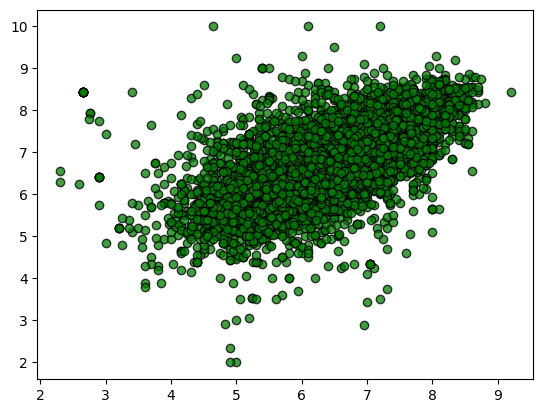

In [79]:
#stats.ttest_ind(imdb_tmdb_merge["imdb_score"], imdb_tmdb_merge["tmdb_score"], equal_var=False)
plt.scatter(imdb_tmdb_merge["imdb_score"], imdb_tmdb_merge["tmdb_score"], alpha=0.75, edgecolors="black", c="green")

In [80]:
def regression_plot(x_values, y_values, title, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color='red')
    plt.title(str(title))
    plt.xlabel(str(xlabel))
    plt.ylabel(str(ylabel))
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [81]:
slope

NameError: name 'slope' is not defined

The r-squared is: nan


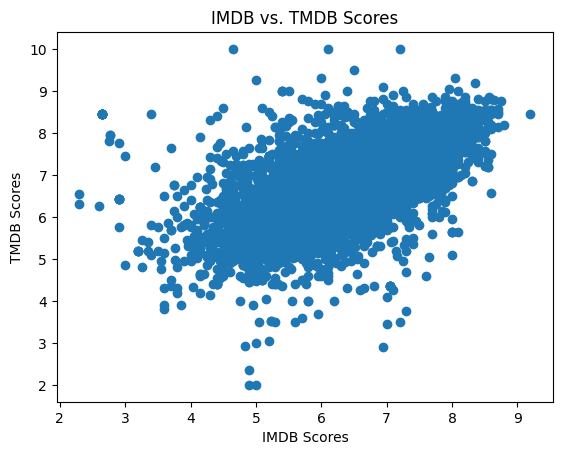

In [ ]:
regression_plot(imdb_tmdb_merge["imdb_score"], 
                imdb_tmdb_merge["tmdb_score"], 
                "IMDB vs. TMDB Scores", 
                "IMDB Scores", 
                "TMDB Scores")

In [ ]:
final_cast_df3 = pd.merge(final_cast_df, netflix_df, on='id')
final_cast_df3 = final_cast_df3[["id", "title_x", "cast", "genres", "imdb_score_x", "imdb_votes_x"]]
final_cast_df3.columns = ["id", "title", "cast", "genres", "imdb_score", "imdb_votes"]
final_cast_df3 = final_cast_df3[final_cast_df3["imdb_votes"] > 10000]
final_cast_df3

,id,title,cast,genres,imdb_score,imdb_votes
0,tm84618,Taxi Driver,"[Robert De Niro, Harvey Keitel, Cybill Shepher...","['drama', 'crime']",8.2,808582.0
1,tm154986,Deliverance,"[Jon Voight, Burt Reynolds, Ronny Cox, Billy R...","['drama', 'action', 'thriller', 'european']",7.7,107673.0
2,tm127384,Monty Python and the Holy Grail,"[Graham Chapman, John Cleese, Eric Idle, Terry...","['fantasy', 'action', 'comedy']",8.2,534486.0
3,tm120801,The Dirty Dozen,"[Lee Marvin, Ernest Borgnine, Jim Brown, Rober...","['war', 'action']",7.7,72662.0
4,ts22164,Monty Python's Flying Circus,"[Graham Chapman, Michael Palin, Terry Jones, E...","['comedy', 'european']",8.8,73424.0
...,...,...,...,...,...,...
4266,tm867681,Haseen Dillruba,"[Taapsee Pannu, Vikrant Massey, Harshvardhan R...","['romance', 'thriller', 'crime', 'drama']",6.9,26194.0
4283,tm1030241,Kurup,"[Dulquer Salmaan, Sobhita Dhulipala, Indrajith...","['thriller', 'crime']",7.1,12251.0
4299,tm1109843,Meenakshi Sundareshwar,"[Sanya Malhotra, Abhimanyu Dasani, Purnendu Bh...","['romance', 'comedy']",7.1,17366.0
4337,tm1115392,Shyam Singha Roy,"[Nani, Sai Pallavi, Krithi Shetty, Madonna Seb...","['drama', 'romance', 'thriller', 'horror']",7.7,11655.0


In [92]:
actor_genres = []

for index, row in final_cast_df3.iterrows():
    for actor in row["cast"]:
                actor_genres.append({"name": actor, "genres": row["genres"], "imdb_score": row["imdb_score"], "imdb_votes": row["imdb_votes"]})


multiple_actor_df3 = pd.DataFrame(actor_genres, columns=["name", "genres", "imdb_score", "imdb_votes"])


In [96]:
crime_list = []
for index, row in multiple_actor_df3.iterrows():
    if "crime" in row['genres']:
        crime_list.append({"name": row["name"], "imdb_score": row["imdb_score"], "imdb_votes": row["imdb_votes"]})

crime_actors = pd.DataFrame(crime_list, columns=["name", "imdb_score", "imdb_votes"])

most_votes_df3 = pd.DataFrame(crime_actors.groupby("name")["imdb_votes"].sum())
average_votes_df3 = pd.DataFrame(crime_actors.groupby("name")["imdb_score"].mean())

final_crime_df = pd.merge(most_votes_df3, average_votes_df3, on="name")
final_crime_df.head()

,imdb_votes,imdb_score
name,,
50 Cent,173080.0,6.7
Aadukalam Murugadoss,10548.0,8.5
Aamir Bashir,54709.0,8.1
Aamir Khan,190592.0,7.6
Aanjjan Srivastav,13203.0,6.8


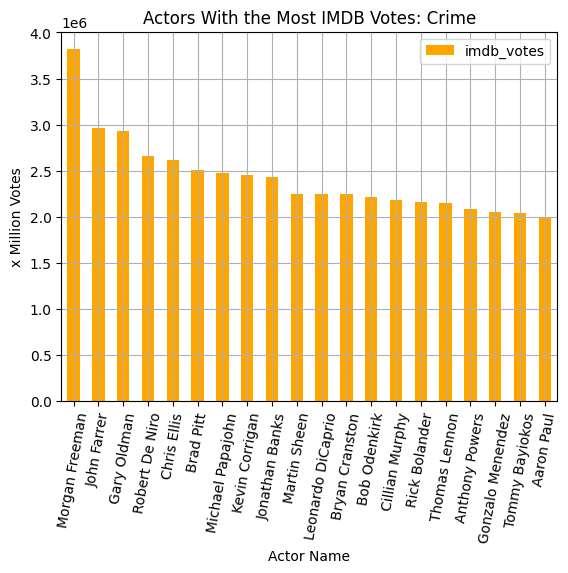

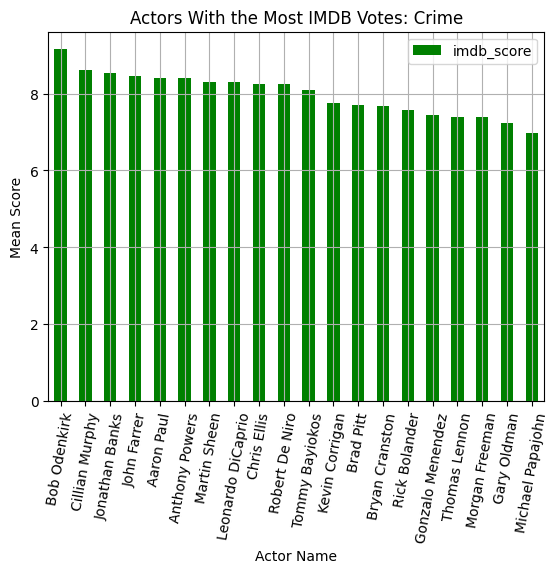

In [107]:
most_crime_votes_df = final_crime_df.sort_values("imdb_votes", ascending=False)
best_crime = most_crime_votes_df.head(20)
best_crime.plot.bar(y='imdb_votes', color='orange', width=0.5)
plt.xlabel('Actor Name')
plt.title('Actors With the Most IMDB Votes: Crime')
plt.ylabel('x Million Votes')
plt.xticks(rotation=80)
plt.grid()

best_score_most_votes_crime = best_crime.sort_values("imdb_score", ascending=False)
best_score_most_votes_crime.plot.bar(y='imdb_score', color='green', width=0.5)
plt.title('Actors With the Most IMDB Votes: Crime')
plt.xlabel('Actor Name')
plt.ylabel('Mean Score')
plt.xticks(rotation=80)
plt.grid()

plt.show()


In [111]:
bins = final_crime_df.columns.tolist()
plt.hist(final_crime_df, bins=final_crime_df["name"])
bins

KeyError: 'name'